In [120]:
import numpy as np

In [121]:
def bisect(f, xl, xr, eps=1e-9):
    fl = f(xl)
    fr = f(xr)
    assert(fl * fr < 0)
    while xr - xl > eps:
        mid = (xl + xr) / 2
        fm = f(mid)
        if fl * fm < 0:
            xr = mid
            fr = fm
        elif fm * fr < 0:
            xl = mid
            fl = fm
        else:
            return mid
    return (xl + xr) / 2

In [122]:
def newtons(f, df, x0, max_iters=10000, eps=1e-9):
    if abs(f(x0)) < eps:
        return x0
    for _ in range(max_iters):
        dv = df(x0)
        v = f(x0)
        assert(dv != 0.0)
        x0 = x0 - v / dv
        if abs(f(x0)) < eps:
            return x0
    assert(False)

## 1.

In [123]:
def kth_root_eq(k, a):
    assert(a >= 0 and k >= 1)
    return lambda x: pow(x,k) - a
def d_kth_root_eq(k, a):
    assert(a >= 0 and k >= 1)
    return lambda x: k * pow(x, k - 1)

In [124]:
def solve_kth_root_bisect(k, a):
    eq = kth_root_eq(k, a)
    x0 = bisect(eq, 0, a + 1)
    return x0

In [125]:
solve_kth_root_bisect(2, 2)

1.4142135620350018

In [126]:
def solve_kth_root_newtons(k, a):
    eq = kth_root_eq(k, a)
    deq = d_kth_root_eq(k, a)
    x0 = newtons(eq, deq, a)
    return x0

In [127]:
solve_kth_root_newtons(2, 2)

1.4142135623746899

In [128]:
for a in range(1, 100):
    for k in range(1, 100):
        assert(np.isclose(solve_kth_root_bisect(k, a), solve_kth_root_newtons(k, a), rtol=1e-6))

## 2.

In [129]:
def locate_roots(f, xl, xr, step=1e-4):
    x = xl
    r = []
    while x <= xr:
        r.append((x, f(x)))
        x += step
    results = [
        (x1, x2)
        for ((x1, v1), (x2, v2)) in zip(r, r[1:])
        if v1 * v2 < 0
    ]
    return results

In [130]:
locate_roots(kth_root_eq(2, 2), 1, 2)

[(1.4141999999999544, 1.4142999999999544)]

In [131]:
def polynom_roots(p, xl, xr):
    root_locations = locate_roots(p, xl, xr)
    roots = [bisect(p, xl, xr) for (xl, xr) in root_locations]
    return roots

In [132]:
def make_polynom(coefs):
    return lambda x: sum([coef * x**i for i, coef in enumerate(coefs)])

In [133]:
polynom_roots(make_polynom([0, 2, 1]), -5, 5)

[-2.00000000037958, -3.7978384273521135e-10]

In [134]:
def d_polynom(coefs):
    return lambda x: sum([coef * (i+1) * x**i for i, coef in enumerate(coefs[1:])])

In [135]:
def polynom_minimum(p, dp, xl, xr):
    dp_roots = polynom_roots(dp, xl, xr)
    values = [p(x) for x in dp_roots]
    return min(zip(values, dp_roots))

In [136]:
p_coefs = [0, 2, 1]
polynom_minimum(make_polynom(p_coefs), d_polynom(p_coefs), -5, 5)

(-1.0, -1.00000000037969)

In [137]:
p_coefs = [1, 254921/20790, -66599/4620, 107279/20790, -3211/4620, 127/4158]
p = make_polynom(p_coefs)
dp = d_polynom(p_coefs)

In [138]:
%matplotlib inline
import matplotlib.pyplot as plt

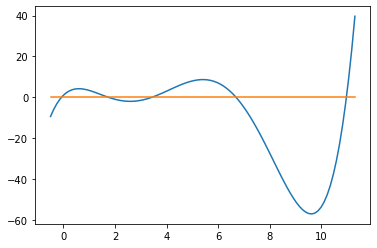

In [139]:
xs = np.linspace(-0.5, 11.3, 100)
ys = [p(x) for x in xs]
plt.plot(xs, ys)
plt.plot(xs, [0] * len(xs))

In [140]:
polynom_roots(p, -0.5, 11.3)

[-0.0747991703033846,
 1.7379943004606015,
 3.431626973345675,
 6.689648561475371,
 10.970647445284971]

In [141]:
polynom_minimum(p, dp, -0.5, 11.3)

(-57.16762543079767, 9.60946808890387)

## 3.

In [142]:
def ternary_min_search(f, xl, xr, eps=1e-9):
    while xr - xl > eps:
        xml = (2 * xl + xr) / 3
        xmr = (xl + 2 * xr) / 3
        if f(xmr) > f(xml):
            xr = xmr
        else:
            xl = xml
    return (xl + xr) / 2

In [143]:
ternary_min_search(make_polynom([0, -2, 1]), 0, 2) # x^2-2x

1.0000000102940865

In [144]:
def make_fun(a, b, c, d):
    f = lambda x: np.exp(a * x) + np.exp(-b * x) + c * (x - d)**2
    df = lambda x: a * np.exp(a * x) - b * np.exp(-b * x) + 2 * c * (x - d)
    ddf = lambda x: a**2 * np.exp(a * x) + b**2 * np.exp(-b * x) + 2 * c
    return f, df, ddf

In [145]:
f, df, ddf = make_fun(1, 2, 3, 4)
xl, xr = -10, 10

Так как $a, b, c > 0$, то функция выпуклая, достаточно найти корень производной

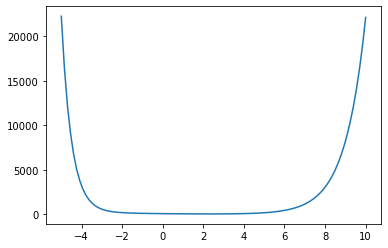

In [146]:
xs = np.linspace(-5, 10, 100)
plt.plot(xs, [f(x) for x in xs])

In [147]:
print(bisect(df, xl, xr))
print(newtons(df, ddf, xr, max_iters=10000))
print(ternary_min_search(f, xl, xr))

2.315283729985822
2.315283729985808
2.315283750704185
